***
<font size=+2>ID: **AI-0009**</font><br>
<font size=+2>Submission Date: **22-04-2018**</font>
***

## Abstract:
**"Real Time Face Recognition"**<br>
The Project focuses on Face Recognition using face_recognition API and OpenCV. The Model is first trained on photos of some desired persons. Number of photos of each person is up to the user's interest but minimum is 2. The program automatically suits to different number of photos. The main workforce behind the Project is the face_encodings() framework of face_recognition API. The program takes the input through the Webcam and compares faces every other frame with the known face encodings extracted from the Trained Faces. A rectangle with the recognized person's name appears with the help of OpenCV. 'Unknown' appears below the rectangle if the person of interest is unrecognized. The program crosschecks multiple images of each person and outputs considering the highest confidence level. So, accuracy of the Recognation is close to 100%. The program can recognize multiple faces in a single frame.  

## Purpose of the Assignment:
The Project is basically the Artificial Intelligence of a broader Project that can provide Home Security. Integrated with a Raspberry-Pi shield, an Automatic Door Locking System can be built based on Face Recognition.
***

## Dependencies:
**The following dependencies must be installed on your system to run this program:**
1. OpenCV
2. dlib
3. face_recognition

## Directory:
The photos(Train Images) of persons should be put in different folders. For example, if there are 3 persons 'A', 'B', 'C', 3 different folders named 'A', 'B', 'C' respectively should be created containing corresponding images of the 3 persons. The folder names should be according to the persons' names as it will show up as output. These folders should be kept in a root folder and no other files or folders should be kept along with them. Now the directory should be located by the ROOT variable in the first cell. For my case, I've put the folders in 'H:/Python/Face Recognition/Training Data' directory. It is also recommended that the Train Images be axis aligned(no rotation), if not, cropping can be a solution to preferably make it work.

In [1]:
# Face Recognition

import os
import cv2
import face_recognition

ROOT = 'H:/Python/Face Recognition/Training Data'
known_names = os.listdir(ROOT)
n = len(known_names)

# Training

known_face_encodings = []
n_img = []

for imdir in known_names:
    xdir = os.listdir(os.path.join(ROOT, imdir))
    n_img += [len(xdir)]
    for x in xdir:
        imgr = face_recognition.load_image_file(os.path.join(ROOT, imdir, x))
        imge = face_recognition.face_encodings(imgr)[0]
        known_face_encodings += [imge]

In [2]:
# Webcam Real Time Face Recognition

video_capture = cv2.VideoCapture(0)
process_this_frame = True

while True:
    
    # Single Frame
    ret, frame = video_capture.read()
    
    # Resize frame of video to 1/4 size for faster Face Recognition Processing
    small_frame = cv2.resize(frame, (0, 0), fx = 0.25, fy = 0.25)
    
    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]
    
    # Only process every other Frame of Video to save time
    if process_this_frame:
        
        face_locs = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locs)
        face_names = []
        
        for fe in face_encodings:
            
            matches = face_recognition.compare_faces(known_face_encodings, fe)
            face_name = 'Unknown'
            
            idxs = 0
            idxe = n_img[0]
            confidences = [0 for i in range(n)]
            
            for i in range(n):
                for check in matches[idxs:idxe]:
                    if check:
                        confidences[i] += 1
                idxs = idxe
                try:
                    idxe += n_img[i + 1]
                except:
                    pass
                    
            if max(confidences) >= 2:
                face_name = known_names[confidences.index(max(confidences))]
                
            face_names.append(face_name)
        
    process_this_frame = not process_this_frame
        
    for (top, right, bottom, left), face_name in zip(face_locs, face_names):

        # Scale back up Face Locations since the detected Frame was scaled down to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, face_name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting Image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [3]:
# Release handle to the Webcam
video_capture.release()
cv2.destroyAllWindows()

## Demonstration:
The program successfully recognizes persons with their faces trained. Recognition performance was also tested on multiple persons in one frame.

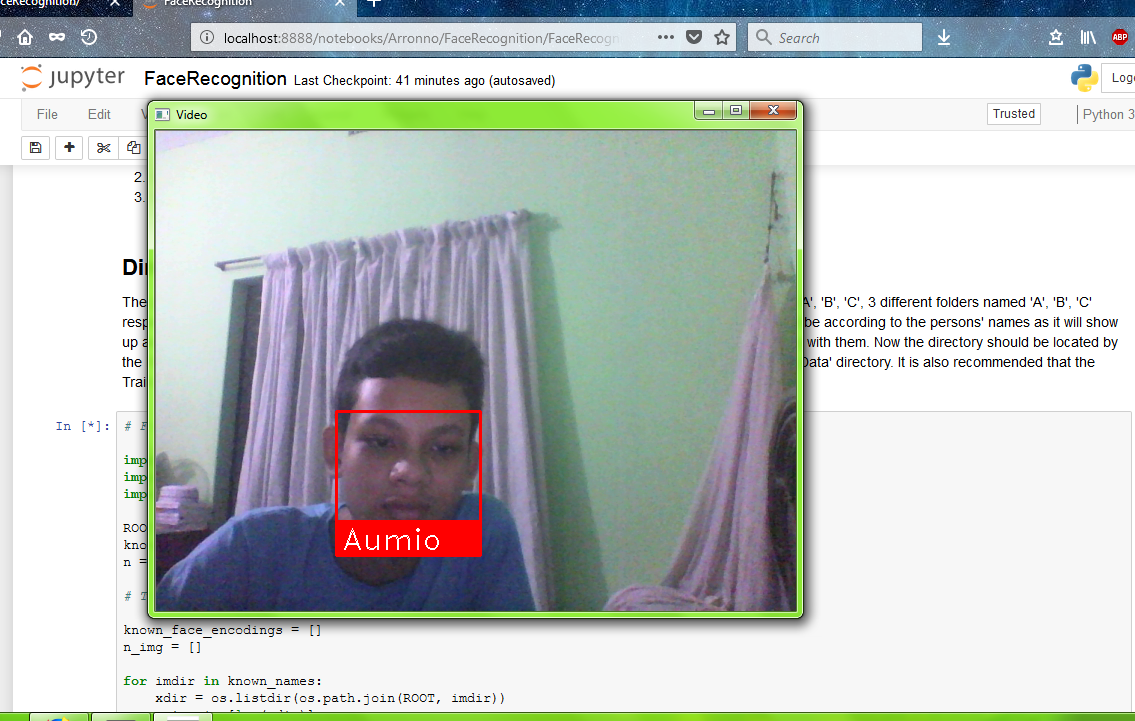

In [5]:
from IPython.display import Image
Image('Demo.png')

**Note:** The person above is my cousin.

## Discussion:
The project can be improved with the introduction of Auto Alignment. That would provide the flexibility of Train Images' shape. 